# Project 4 BeakNet: A Bird Prediction Model

In [425]:
# Imports
import os
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import PIL
from PIL import Image
import tensorflow as tf
import keras
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix

In [426]:
#csv import
master_df = pd.read_csv(r'C:\Users\username\Downloads\project_4\birds.csv')

#Splitting the DataFrame into three based on the values in the 'data set' column
train_set_df = master_df[master_df['data set'] == 'train']
val_set_df = master_df[master_df['data set'] == 'valid']
test_set_df = master_df[master_df['data set'] == 'test']

In [427]:
test_set_df.tail(3)

,class id,filepaths,labels,data set,scientific name
2500,14,test/AMERICAN AVOCET/3.jpg,AMERICAN AVOCET,test,PSITTACULA EUPATRIA
2501,14,test/AMERICAN AVOCET/4.jpg,AMERICAN AVOCET,test,PSITTACULA EUPATRIA
2502,14,test/AMERICAN AVOCET/5.jpg,AMERICAN AVOCET,test,PSITTACULA EUPATRIA


In [428]:
test_set_df.iloc[-1,0]

14

In [429]:
#training data import

#We need to import the images from each species folder and label them based on the folder's name

#training data path
train_path = r'C:\Users\loolz\Downloads\project_4\train'

#getting a list of the subfolders in the training folder (each subfolder corresponds to a class)
class_names = os.listdir(train_path)

#initializing empty lists for the training images and labels
train_images = []
train_labels = []
train_labels_id = []
i = 0 

#getting the total number of images
total_images = sum([len(files) for r, d, files in os.walk(train_path)])

#looping over the subfolders and load the images with tqdm progress bar
with tqdm(total=total_images, desc='Loading images') as pbar:
    for class_name in class_names:
        class_path = os.path.join(train_path, class_name)
        for filename in os.listdir(class_path):
            
            image_path = os.path.join(class_path, filename)
            image = Image.open(image_path)
            image = image.resize((150, 150))
            image = np.array(image)

            id_label = train_set_df.iloc[i,0]
            train_labels_id.append(id_label)      

            train_images.append(image)
            train_labels.append(class_name)
            pbar.update(1)
            i = i + 1

#converting the lists to NumPy arrays
train_images = np.array(train_images)

Loading images: 100%|██████████| 2428/2428 [00:08<00:00, 291.61it/s]


In [430]:
#Double checking work

#Converting test_labels to numeric values using a LabelEncoder
le = LabelEncoder()
train_labels_num = le.fit_transform(train_labels)

correlation = np.corrcoef(train_labels_num, train_labels_id)[0, 1]
print("Correlation between train_labels and train_labels_id:", correlation)

Correlation between train_labels and train_labels_id: 0.9999999999999998


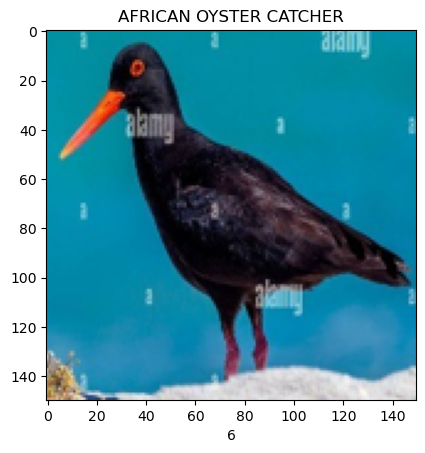

Total number of train images = 2428


In [431]:
#testing that the imported validation images work
plt.imshow(train_images[1000])
plt.title(train_labels[1000])
plt.xlabel(train_labels_id[1000])
plt.show()
print("Total number of train images = " + str(train_images.shape[0]))

In [432]:
#validation data import

#We need to import the images from each species folder and label them based on the folder's name

#validation data path
validation_path = r'C:\Users\Username\Downloads\project_4\valid'

#get a list of the subfolders in the training folder (each subfolder corresponds to a class)
class_names = os.listdir(validation_path)

#Initializing empty lists for the training images and labels
validation_images = []
validation_labels = []
validation_labels_id = []
i = 0

#looping over the subfolders and load the images
for class_name in class_names:
    class_path = os.path.join(validation_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image = Image.open(image_path)
        image = image.resize((150, 150))
        image = np.array(image)

        id_label = val_set_df.iloc[i,0]
        validation_labels_id.append(id_label)   

        validation_images.append(image)
        validation_labels.append(class_name)
        i = i + 1

#converting the lists to NumPy arrays
validation_images = np.array(validation_images)

In [433]:
#Double checking work

# Convert test_labels to numeric values using a LabelEncoder
le = LabelEncoder()
validation_labels_num = le.fit_transform(validation_labels)

correlation = np.corrcoef(validation_labels_num, validation_labels_id)[0, 1]

print("Correlation between validation_labels and validation_labels_id:", correlation)

Correlation between validation_labels and validation_labels_id: 1.0


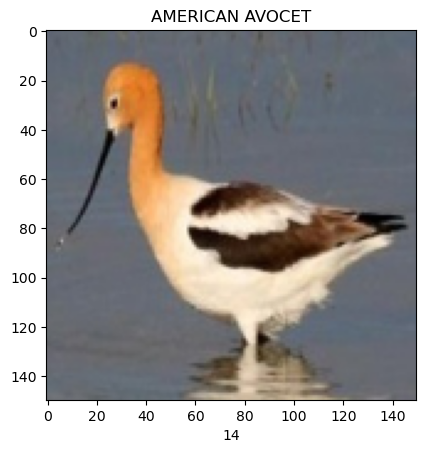

Total number of validation images = 75


In [434]:
#testing that the imported validation images work
plt.imshow(validation_images[74])
plt.title(validation_labels[74])
plt.xlabel(validation_labels_id[74])
plt.show()
print("Total number of validation images = " + str(validation_images.shape[0]))

In [435]:
#testing data import

#We need to import the images from each species folder and label them based on the folder's name

# testing data path
test_path = r'C:\Users\Username\Downloads\project_4\test'

#geting a list of the subfolders in the training folder (each subfolder corresponds to a class)
class_names = os.listdir(test_path)

#initializing empty lists for the training images and labels
test_images = []
test_labels = []
test_labels_id = []
i = 0

#getting the total number of images
total_images = sum([len(files) for r, d, files in os.walk(test_path)])

#looping over the subfolders and load the images with tqdm progress bar
with tqdm(total=total_images, desc='Loading images') as pbar:
    for class_name in class_names:
        class_path = os.path.join(test_path, class_name)
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = Image.open(image_path)
            image = image.resize((150, 150))
            image = np.array(image)

            id_label = test_set_df.iloc[i,0]
            test_labels_id.append(id_label)   

            test_images.append(image)
            test_labels.append(class_name)
            pbar.update(1)
            i = i + 1

#converting the lists to NumPy arrays
test_images = np.array(test_images)

Loading images: 100%|██████████| 75/75 [00:00<00:00, 291.62it/s]


In [436]:
#Double checking work

#convert test_labels to numeric values using a LabelEncoder
le = LabelEncoder()
validation_labels_num = le.fit_transform(validation_labels)

correlation = np.corrcoef(validation_labels_num, validation_labels_id)[0, 1]
print("Correlation between validation_labels and validation_labels_id:", correlation)

Correlation between validation_labels and validation_labels_id: 1.0


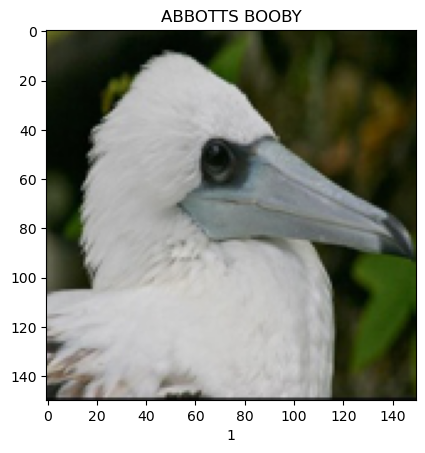

Total number of test images = 75


In [437]:
#testing that the imported test images work
plt.imshow(test_images[5])
plt.title(test_labels[5])
plt.xlabel(test_labels_id[5])
plt.show()
print("Total number of test images = " + str(test_images.shape[0]))

In [438]:
#Choosing 15 bird classes / species which the model will be trained on. 
spec_list = ["ABBOTTS BABBLER" , "ABBOTTS BOOBY" , "ABYSSINIAN GROUND HORNBILL" , "AFRICAN CROWNED CRANE" , "AFRICAN EMERALD CUCKOO" , "AFRICAN FIREFINCH" , "AFRICAN OYSTER CATCHER" , "AFRICAN PIED HORNBILL" , "AFRICAN PYGMY GOOSE" , "ALBATROSS", "ALBERTS TOWHEE", "ALEXANDRINE PARAKEET", "ALPINE CHOUGH", "ALTAMIRA YELLOWTHROAT", "AMERICAN AVOCET"]

In [439]:
#quick image checking function
def fast_lookup(set,species_name):
    if set == "train":
        num = train_labels.index(species_name)
        plt.imshow(train_images[num])
        plt.title(train_labels[num])
        plt.xlabel("Training Set")
        plt.show()

    elif set == "validation":
        num = validation_labels.index(species_name)
        plt.imshow(validation_images[num])
        plt.title(validation_labels[num])
        plt.xlabel("Validation Set")
        plt.show()

    elif set == "test":
        num = test_labels.index(species_name)
        plt.imshow(test_images[num])
        plt.title(test_labels[num])
        plt.xlabel("Testing Set")
        plt.show()

    else:
        print("wrong set type. Enter either 'train', 'validation', or 'test' as a string")
        return 0  

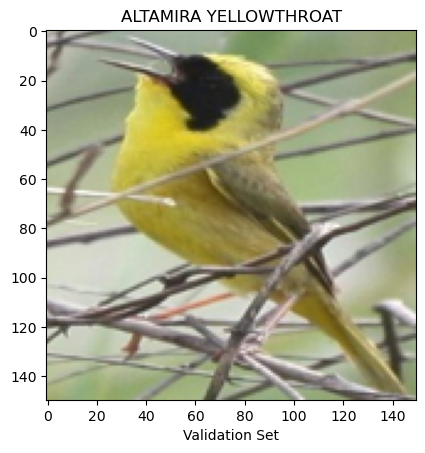

In [440]:
#testing that the chosen species can be looked up from the data: 
fast_lookup("validation",spec_list[13])

In [441]:
#creating a label dictionary for the chosen species
label_dict = {}
index = 0

for label in train_labels:
    if label not in label_dict:
        label_dict[label] = index
        index += 1

train_labels_mat = pd.DataFrame(columns=["id", "labels"], index=range(len(label_dict)))
for label, idx in label_dict.items():
    train_labels_mat.iloc[idx] = [idx, label]

print(train_labels_mat)

    id                      labels
0    0             ABBOTTS BABBLER
1    1               ABBOTTS BOOBY
2    2  ABYSSINIAN GROUND HORNBILL
3    3       AFRICAN CROWNED CRANE
4    4      AFRICAN EMERALD CUCKOO
5    5           AFRICAN FIREFINCH
6    6      AFRICAN OYSTER CATCHER
7    7       AFRICAN PIED HORNBILL
8    8         AFRICAN PYGMY GOOSE
9    9                   ALBATROSS
10  10              ALBERTS TOWHEE
11  11        ALEXANDRINE PARAKEET
12  12               ALPINE CHOUGH
13  13       ALTAMIRA YELLOWTHROAT
14  14             AMERICAN AVOCET


In [445]:
# normalising the data
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

In [446]:
# converting training images into tensors
train_images = tf.convert_to_tensor(train_images)
train_labels_id = tf.convert_to_tensor(train_labels_id, dtype=tf.int32)
train_images.shape, train_labels_id.shape

(TensorShape([2428, 150, 150, 3]), TensorShape([2428]))

In [447]:
# converting validation images into tensors
validation_images = tf.convert_to_tensor(validation_images)
validation_labels_id = tf.convert_to_tensor(validation_labels_id, dtype=tf.int32)   #Testing if dtype will solve the issue
validation_images.shape, validation_labels_id.shape

(TensorShape([75, 150, 150, 3]), TensorShape([75]))

In [448]:
# converting test images into tensors
test_images = tf.convert_to_tensor(test_images)
test_labels_id = tf.convert_to_tensor(test_labels_id, dtype=tf.int32)
test_images.shape, test_labels_id.shape

(TensorShape([75, 150, 150, 3]), TensorShape([75]))

In [449]:
# A Sequential model (in Keras) allows creating layer after layer
model = keras.Sequential()

model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu')) #Checkout the continuity class Conv2D documentation to find default stride, padding
#32 filters of size (3,3) that will learn to detect features in the input image

model.add(MaxPooling2D((2,2)))  #downsamples the spatial dimensions of the input by taking the maximum value within a local neighborhood. 
#(2,2) downsample the input image by a factor of 2 in both the height and width dimensions.

model.add(Conv2D(64,(3,3),input_shape=(74,74,3),activation='relu'))
#64 filters of size (3,3) that will learn to detect features in the input image
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape=(34,34,3),activation='relu'))
#64 filters of size (3,3) that will learn to detect features in the input image
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25)) 

model.add(Dense(15,activation='softmax')) 

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_141 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 74, 74, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_142 (Conv2D)         (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 36, 36, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_143 (Conv2D)         (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_143 (MaxPooli  (None, 17, 17, 64)     

c:\Users\loolz\anaconda3\lib\site-packages\keras\backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 [==============================] - 54s 1s/step - loss: 2.4404 - accuracy: 0.2018 - val_loss: 1.9883 - val_accuracy: 0.4133
Epoch 2/7
49/49 [==============================] - 46s 937ms/step - loss: 1.5720 - accuracy: 0.4909 - val_loss: 1.2869 - val_accuracy: 0.6267
Epoch 3/7
49/49 [==============================] - 46s 942ms/step - loss: 1.0531 - accuracy: 0.6627 - val_loss: 0.9124 - val_accuracy: 0.7067
Epoch 4/7
49/49 [==============================] - 46s 943ms/step - loss: 0.7300 - accuracy: 0.7657 - val_loss: 1.0203 - val_accuracy: 0.7333
Epoch 5/7
49/49 [==============================] - 50s 1s/step - loss: 0.5099 - accuracy: 0.8328 - val_loss: 0.7319 - val_accuracy: 0.8267
Epoch 6/7
49/49 [==============================] - 48s 969ms/step - loss: 0.3017 - accuracy: 0.8983 - val_loss: 0.9318 - val_accuracy: 0.7200
Epoch 7/7
49/49 [==============================] - 45s 923ms/step - loss: 0.1814 - accuracy: 0.9415 - val_loss: 0.8159 - val_accuracy: 0.7467


# Training

In [451]:
history = model.fit(train_images, train_labels_id, epochs = 7, validation_data = (validation_images, validation_labels_id), batch_size=50)

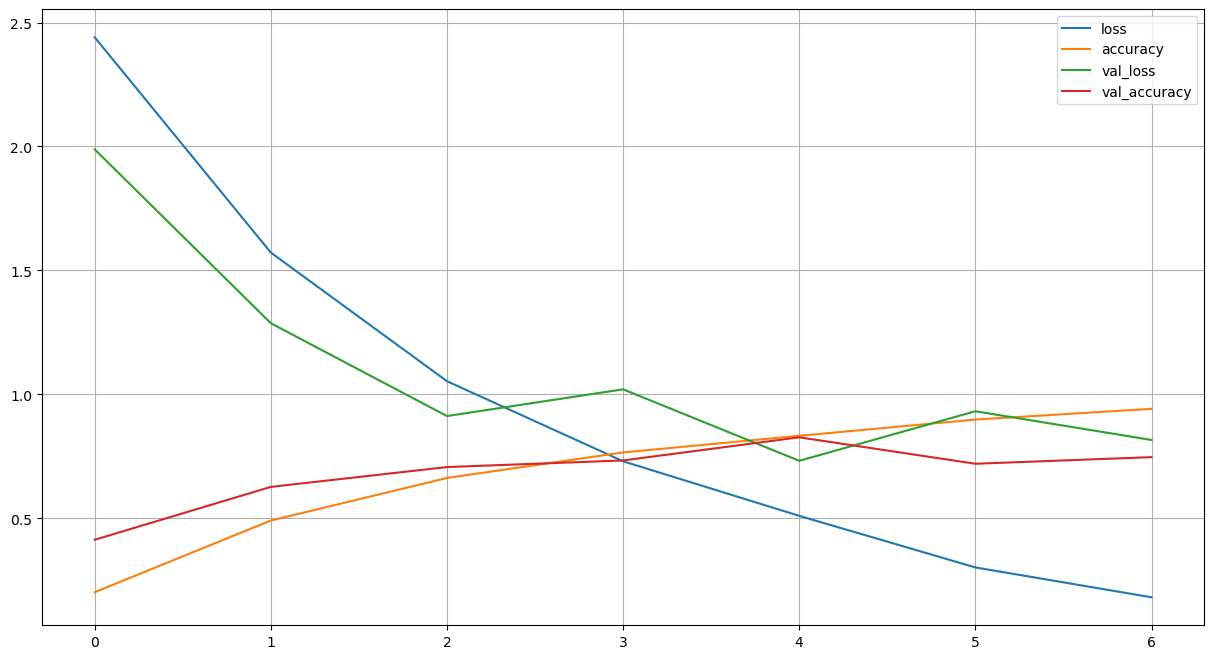

In [457]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca()
plt.show()

In [458]:
# Evaluating our model
score = model.evaluate(test_images, test_labels_id, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6196291446685791
Test accuracy: 0.8399999737739563


In [459]:
# Obtaining predictions
predictions = model.predict(test_images)
preds = [np.argmax(p) for p in predictions] # Grab the class with highest probability 

3/3 [==============================] - 1s 136ms/step


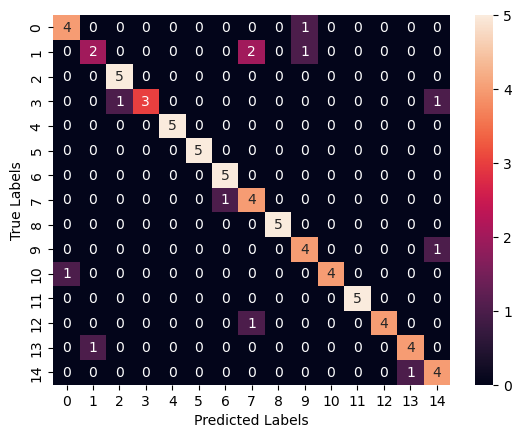

In [460]:
# Visualizing our model's true labels vs preds
sns.heatmap(confusion_matrix(test_labels_id, preds), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

The final neural network architecture was chosen following testing several different hyper parameters. 

Summary of Previous Test Scores: 

Epochs = 5,7
First Layer - 32 filters
No Relu
15,Softmax
Test Accuracy = 0.80

Epochs = 5
First Layer - 32 filters
30, Relu
15,Softmax
Test Accuracy = 0.73

Epochs = 7
First Layer - 64 filters instead of 32
No Relu
15,Softmax
Test Accuracy = 0.827

Epochs = 4
First Layer - 64 filters instead of 32
No Relu
15,Softmax
Test Accuracy = 0.827

--------------
Epochs = 5 
First Layer - 64 filters instead of 32
Batch size 50
No Relu
15,Softmax
Test Accuracy = 0.853!! - I can't replicate it now

Epochs = 5 
First Layer - 128 filters 
Batch size 50
No Relu
15,Softmax
Test Accuracy = 0.80

Epochs = 5 
First Layer - 64 filters 
Second CNN - 32 Filters
Batch size 50
No Relu
15,Softmax
Test Accuracy = 0.80

Epochs = 2
First Layer - 64 filters 
Second CNN - 64 Filters
With validation Data
Logits = False
0.84 Accuracy

Epochs = 5
First Layer - 64 filters 
Second CNN - 64 Filters
Without validation Data
Logits = True
0.80  Accuracy

Epochs = 5
First Layer - 64 filters 
Second CNN - 64 Filters
With Validation
Logits = True
Accuracy = 0.84

In [456]:
# Classification report -> evaluation metrics for our model 
print(classification_report(test_labels_id,preds,digits=3))

              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.667     0.400     0.500         5
           2      0.833     1.000     0.909         5
           3      1.000     0.600     0.750         5
           4      1.000     1.000     1.000         5
           5      1.000     1.000     1.000         5
           6      0.833     1.000     0.909         5
           7      0.571     0.800     0.667         5
           8      1.000     1.000     1.000         5
           9      0.667     0.800     0.727         5
          10      1.000     0.800     0.889         5
          11      1.000     1.000     1.000         5
          12      1.000     0.800     0.889         5
          13      0.800     0.800     0.800         5
          14      0.667     0.800     0.727         5

    accuracy                          0.840        75
   macro avg      0.856     0.840     0.838        75
weighted avg      0.856   